In [5]:
from utils import *

t_tot = 0.48 # Total frequency sweep time in units of seconds
t_inc = 1 # Increment time length, in integer multiples of 100 us
dist = 0.25 # Total transport distance in units of meters, ignored if round_trip = True
round_trip = True # If True, the transport will be a round trip, otherwise it will be one way
wait_time = 0.05 # Time to wait at the end of the transport in units of seconds, only used if round_trip = True

trajName = f'round_trip_dist={dist}_wait_time={wait_time}'

t_vec, freqdiff = freqdiff_flattop(t_inc, t_tot, dist=dist, round_trip=round_trip, wait_time=wait_time)
freq1 = ["0%#10.7f" % (x + float(defaultfreq1)) for x in (freqdiff)]

freq0 = [defaultfreq0] * len(t_vec)
amp0 = [defaultamp0] * len(t_vec)
amp1 = [defaultamp1] * len(t_vec)
phase0 = [defaultphase0] * len(t_vec)
phase1 = [defaultphase1] * len(t_vec)

dist_actual = distance_traveled(freqdiff, interval=t_inc*1e-4)
accel = np.diff(freqdiff) * 1e6 / (t_inc*0.0001) * wavelength
max_accel = np.max(accel)
print(f'Traveled distance (m) = {dist_actual}\nMax acceleration (m/s^2) = {max_accel}')

Traveled distance (m) = 0.5000000101611201
Max acceleration (m/s^2) = 23.665488000000103


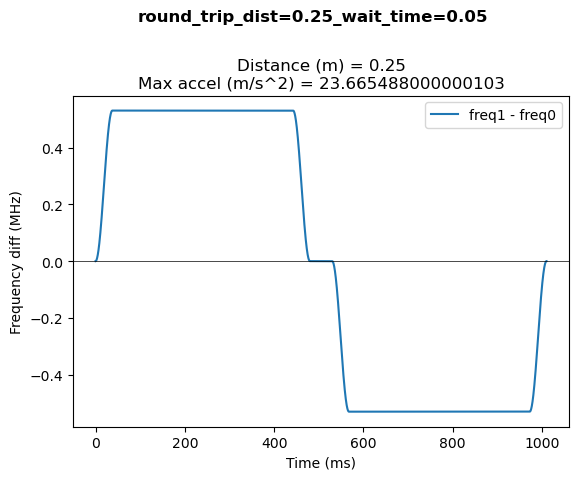

In [6]:
fig, ax = plt.subplots()
fig.suptitle(trajName, fontweight='bold')
fig.subplots_adjust(top=0.8)
ax.set_title('Distance (m) = ' + str(dist) + '\n' + 'Max accel (m/s^2) = ' + str(max_accel))
ax.plot(t_vec * t_inc * 0.1, freqdiff)
ax.axhline(0, c='k', linewidth=0.5)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Frequency diff (MHz)')
ax.legend(['freq1 - freq0'])
plt.show()

In [7]:
save_table(freq0, freq1, amp0, amp1, phase0, phase1, t_inc, trajName, fig)

Table saved as 2023-08-21_19-11-03_round_trip_dist=0.25_wait_time=0.05.txt
Figure saved as 2023-08-21_19-11-03_round_trip_dist=0.25_wait_time=0.05.txt.png
